## Linear Regression Model Development and Refinement: Review (Part-2)

present article, Multiple Linear Regressions including Polynomial regressions are reviewed, illustrated and compared in the terms of fitness to the given data. Besides, the cross-validation technique is utilized to deal with over-fitting versus under-fitting trends.  


The Regression model is one of the widely used models in the traditional statistical analysis, as well as, in the new technology, Machine Learning. The common regression models involve Simple Regression, Multiple Regression, Polynomial Regression, Ridge Regression and Logistic Regression. The first four algorithms are applied for continuous numerical data whilst the latter used, one or more predictor variables that may be either continuous or categorical data. 

The concept of Simple Regression is actually popular in basic algebra, symbolized in an X and Y relationship, where a change on the X is triggered with a change on a value of Y. Presumably, a correlation analogy remained relevant and simple for understanding in the scholarly community and used widely.

The present article is a brief report on efforts to develop and refine the Linear Regression model for use in numerical data. Key components of the model are assessed, visualized and measured to check the appropriateness of the same for the given data, including:

* Analysis of cross-validation
* The quantification of R-Square and mean square errors
* Visualization of regression, distribution plot

The assessments are conducted on both Multiple Linear Regression and Polynomial Regression. The features/attributes used in the present test are namely,**horsepower, curb-weight, engine-size, highway-mpg against target variable (price)**.  No significant difference was found on Linear Regression and Polynomial Regression in terms of numerical results. Indeed, they are two parallel methods used in different circumstance on the basis of data distribution is whether Linear or non-Linear.

------------------------------------------------------------------------
|Description        |Multiple Linear Regression | Polynomial Regression|
|-------------------|---------------------------|----------------------|
|means square error |  13623765                 | 518334590            |
|-------------------|---------------------------|------------------- --|
|R_square           |  0.74                     |  0.75                |
|-------------------|-------------------------- |----------------- ----|
|distribution plot  |  True                     |  True                |
|-------------------|---------------------------|----------------------|
|over-fitting trend |  False                    |  N/A                 |              
|-------------------|---------------------------|----------------------|
|under-fitting trend|  True                     |  N/A                 |
|-------------------|---------------------------|----------------------|
|cross-val score 31%|   31%                     |  31%                 |
|-------------------|---------------------------|----------------------|---

The key measure for any model is its ability to predict in accuracy with small error on unseen data(not part of training data). The present model has failed to fulfill this criterion and an alternative model is required. Find the conclusion statement from the end of this article for more information. 

In [1]:
#Import Needed Libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# LOAD DATASET

url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(url)

In [3]:
df.to_csv('module_5_auto.csv')

In [4]:
# For now, let us get numeric only:

df = df._get_numeric_data()
print(df.head())

   Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses  wheel-base  \
0           0             0          3                122        88.6   
1           1             1          3                122        88.6   
2           2             2          1                122        94.5   
3           3             3          2                164        99.8   
4           4             4          2                164        99.4   

     length     width  height  curb-weight  engine-size  ...  stroke  \
0  0.811148  0.890278    48.8         2548          130  ...    2.68   
1  0.811148  0.890278    48.8         2548          130  ...    2.68   
2  0.822681  0.909722    52.4         2823          152  ...    3.47   
3  0.848630  0.919444    54.3         2337          109  ...    3.40   
4  0.848630  0.922222    54.3         2824          136  ...    3.40   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        

In [7]:
# Let us store them in the variable X and y:

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

from sklearn import model_selection

test_size = 0.20
seed = 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = test_size, random_state = seed)

In [9]:
# Creating object
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

In [10]:
# Let us import cross_val_score
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=6, random_state=seed)
Rcross = cross_val_score(LR, X, y, cv = kfold)
print(Rcross)

# Since 6-operation is done via cross validation process, each element in the array supposed 
#to bear average score of accuracy of each fold. Let us print and see:

[ 0.76705814  0.82267354  0.78541786  0.46679847 -1.49924507  0.53821361]


In [11]:
# Of course, let us calculate the mean and standard deviation to estimate accuracy of the model. 
# The result seems woire, the std deviation is greater than the mean.

print("The mean:", Rcross.mean(),'\n' "The std deviation:" , Rcross.std())

The mean: 0.3134860931354068 
The std deviation: 0.8213525884911673


In [12]:
# What about predicting the price through cross validations

from sklearn.model_selection import cross_val_predict

y_cv_pred = cross_val_predict(LR, X, y, cv = kfold)
y_cv_pred[0:5]

array([13250.42192309, 13250.42192309, 18240.56575087, 10204.39712916,
       15146.97755293])

In [13]:
# Let us also predict the sales based the test dataset

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred[0:5]

print(y_pred)

[11457.56050541  5966.17033563 11313.13362185  6839.1134896
 15765.36249767  6054.89432681 19193.71110742 11274.59138528
 15777.91904404  5691.34473287 11447.85995755  6795.49785034
 15731.09306683 18249.41093932 12386.6765838  14052.8739501
  4519.86549286 17260.71051658  6704.95557074  9499.66760217
  9952.56595445  7525.5080357  28384.20140046 13944.41355343
  4025.73928264 34398.95091589 16164.13405655  5950.59966215
 11759.43681975  6910.57215579 16352.28198733 11956.90118114
 11361.15231958  6602.14727822 22100.15767949 16693.48286944
 11944.02890531  9193.80846495 22829.02801405 23489.79780817
  8526.17956937]


In [14]:
# What about the mean errors between observed and predicted sales
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error' '\n' 'difference between' '\n' 'observed price and predicted price: ' , mse)


The mean square error
difference between
observed price and predicted price:  13623765.520788318


In [15]:
# What about R-Square, 
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print(R2)

0.7429274527307541


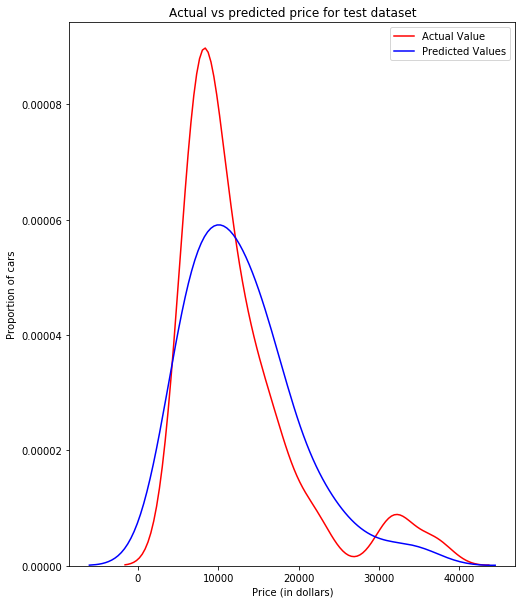

In [16]:
# Let us assess distribution plots between observed and predicted values

width = 8
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs predicted price for test dataset')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')

plt.show()
plt.close()

### Polynomial Regression

Let us apply Polynomial transform and then regression analysis on the same data.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=5)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

#### Next step is creating a linear regression model "poly" training and predicting it.

In [18]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Let us predict
y_poly_pred = poly.predict(X_test_pr)
y_poly_pred[0:5]
print(y_poly_pred)

[ 12672.0004598    5082.35719372   7780.05427356   7598.42077891
   6411.64096673   9482.96723391  17025.00174822   3428.72821177
  43124.48447801  13194.71728413   4579.49261833   7789.31088708
   6018.14142056  42809.43826736   7435.46396501   5377.47781945
 111871.39724359  15026.49440767   6999.67042647   7511.53091035
   9684.93954171  13094.75316585  87793.54295911   4383.67240025
 -14935.60835316  33186.69525541   9615.32050569   7277.2790538
   7016.67871792   9350.43791176   9163.66436685   7583.01202734
  18565.95160617   4915.0924838   20252.02002622   -780.23409616
  11563.80933208   6398.17352338   5444.15541018  34597.56854786
  -1691.04971277]


In [20]:
# Let us calculate the mean error for observed y_test and y_poly_pred after Polynomial transform.¶
mse = mean_squared_error(y_test, y_poly_pred)
print('The mean square error' '\n' 'difference between' '\n' 'observed price and predicted price: ' , mse)


The mean square error
difference between
observed price and predicted price:  403206296.5466852


In [21]:
# Let's look at the first five and compare predicted and actual values.
print("Predicted price:", y_poly_pred[0:5])
print("Actual price:", y_test[0:5].values)

Predicted price: [12672.0004598   5082.35719372  7780.05427356  7598.42077891
  6411.64096673]
Actual price: [ 9549.  6229. 10245.  7295.  9989.]


**R-Square** shown in the next line for test data after polynomial transformation is abnormal. Possible reason is y_test is Linear, whilst y_poly_pred is non-Linear and produced the R-score value beyond the range of (-1 to +1). In other words, use of this formula is irrelevant in the given context.

In [22]:
R2 = r2_score(y_test, y_poly_pred)
print(R2)

-6.6082687690192685


Text(3, 0.75, 'Maximum R^2 ')

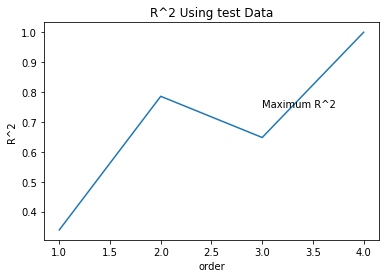

In [23]:
#Let us find out otimal R-Square (Rsqu) in differebt polynomial degrees or orders:

Rsqu_optimal = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    X_train_pr = pr.fit_transform(X_train)
    
    X_test_pr = pr.fit_transform(X_test) 
    
    poly.fit(X_test_pr, y_poly_pred)
    
    Rsqu_optimal.append(poly.score(X_test_pr, y_poly_pred))
    
plt.plot(order, Rsqu_optimal)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

**Conclusion**: Such as Ridge Regression may not bring significant difference from the result indicated above. The key indicator for a model's performance is the accuracy score on the cross-validation test, in this case, it very low (31%). Despite R_square is moderately large, the mean-square-error is high, as illustrated above, the distribution plot has shown the trend of under-fitting. I will conclude this model in the present form is incompatible to the present data and more review is required or an alternative model is needed.

**Acknowledgements**: The data and essential codes used in this report are provided by IBM Cognitive Skill Learning Lab in collaboration with Coursera, the education institute. But, minor modifications have been done in the coding align to my style.